# Pymaceuticals Inc.
---

### Analysis

- When narrowing down to the four treatments indicated (Capomulin, Ramicane, Infubinol, and Ceftamin),               Capomulin and Ramicane seem the most promising with the lowest final tumor size, and no outliers.
- Further drilling down to a single case for the Capomulin treatment seems to support the promising results;         showing a consistent decrease in tumor volume over the course of the study.
- Caveats of note on the preceding analysis that show a need for furhter exploration:
    * Both Capomulin and Ramicane had the largest number of total test points over the other treatments; so, futher       analysis is necessary to determine the impact (if any) of population size on study results.
    * Both Capomulin and Ramicane had the lowest median tumor volume (with corresponding lower standard deviation         and standard error) which--despite the larger test datasets--invites furhter investigation into intial tumor       volumes to determine if there is any issue with diversity among the Capomulin and Ramicane mouse populations       when compared to the other treatment populations. With a strong positive correlation between weight and tumor       size--as shown by the regression (r = 0.84)--lower initial mouse weights for one treatment compared to others       could skew results in favor of that treatment. Additionally with this in mind, analysis of average percent         decrease in tumor volume over time could be helpful in better assessing efficacy.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mouse_merge_df = mouse_merge_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

mouse_merge_df.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
5,k403,25,33.464577,1,Ramicane,Male,21,16
6,k403,30,31.099498,1,Ramicane,Male,21,16
7,k403,35,26.546993,1,Ramicane,Male,21,16
8,k403,40,24.365505,1,Ramicane,Male,21,16
9,k403,45,22.050126,1,Ramicane,Male,21,16


In [26]:
# Checking the number of lines of data.
mouse_count = mouse_merge_df["Mouse ID"].size
mouse_count

1893

In [27]:
# Checking the number of mice.
mouse_count_unique = mouse_merge_df["Mouse ID"].unique().size
mouse_count_unique

249

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dup_ID = mouse_merge_df.loc[mouse_merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
mouse_dup_ID

array(['g989'], dtype=object)

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dups = mouse_merge_df[mouse_merge_df.duplicated(["Mouse ID", "Timepoint"],keep=False)]
mouse_dups

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_df = mouse_merge_df.drop_duplicates(["Mouse ID", "Timepoint"], keep='first')
mouse_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [31]:
# Checking cleanliness
mouse_clean_df.loc[mouse_clean_df["Mouse ID"]=="g989", :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
918,g989,25,56.045564,1,Propriva,Female,21,26
919,g989,30,59.082294,1,Propriva,Female,21,26
920,g989,35,62.570880,2,Propriva,Female,21,26


In [32]:
# Checking the number of clean lines of data.
mouse_count_clean = mouse_clean_df["Mouse ID"].size
mouse_count_clean

1888

In [33]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean_unique = mouse_clean_df["Mouse ID"].unique().size
mouse_count_clean_unique

249

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_tumor_mean = mouse_clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
mouse_tumor_median = mouse_clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
mouse_tumor_variance = mouse_clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
mouse_tumnor_stdev = mouse_clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
mouse_tumor_sem = mouse_clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]




mouse_stats_df = pd.DataFrame({"Mean Tumor Volume": mouse_tumor_mean, 
                                    "Median Tumor Volume":mouse_tumor_median, 
                                    "Tumor Volume Variance":mouse_tumor_variance, 
                                    "Tumor Volume Std. Dev.": mouse_tumnor_stdev, 
                                    "Tumor Volume Std. Err.": mouse_tumor_sem})

# Assemble the resulting series into a single summary DataFrame.
mouse_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mouse_clean_df.groupby('Drug Regimen')[["Tumor Volume (mm3)"]].aggregate(["mean", "median", "var", "std", "sem"])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

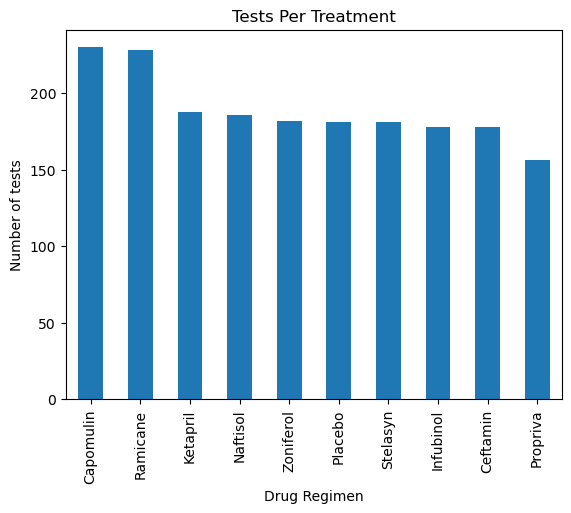

In [36]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Configure and show the plot
mouse_clean_df["Drug Regimen"].value_counts().plot.bar(color="tab:blue", xlabel="Drug Regimen", 
                                                       ylabel="Number of tests", title="Tests Per Treatment")

plt.show()

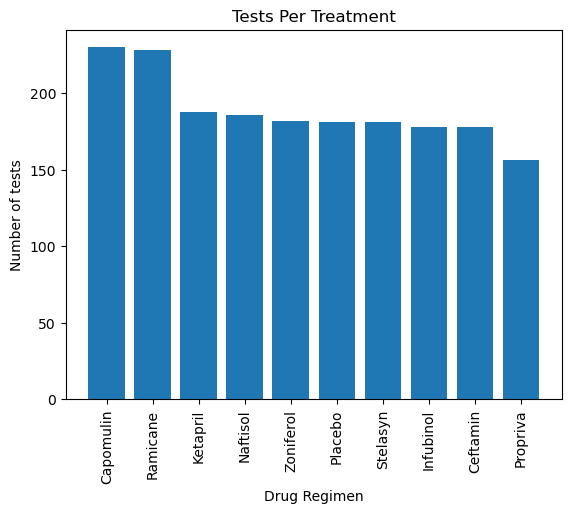

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mouse_tests = mouse_clean_df["Drug Regimen"].value_counts()
x_axis = mouse_tests.index.values
y_axis = mouse_tests.values

plt.bar(x_axis, mouse_tests, color="tab:blue", align="center")

plt.title("Tests Per Treatment")
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of tests")

plt.show()

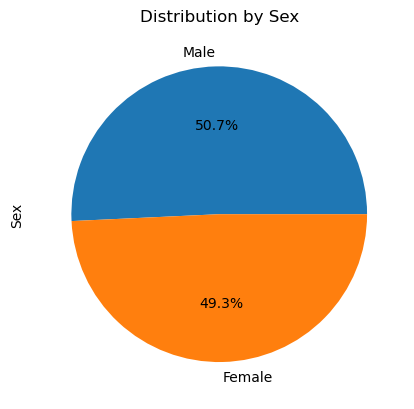

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_clean_df["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%", title="Distribution by Sex")

plt.show()

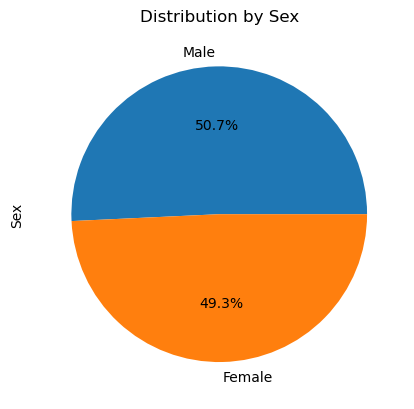

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = mouse_clean_df["Sex"].value_counts()
labels = sex.index.values

sex_plot = plt.pie(sex, labels=labels, autopct="%1.1f%%")
plt.title("Distribution by Sex")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint_df = pd.DataFrame(mouse_clean_df.groupby("Mouse ID")["Timepoint"].max()).rename(columns={"Timepoint": "Final Timepoint"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_merge_df = pd.merge(mouse_clean_df, final_timepoint_df, how="outer", on="Mouse ID")

final_timepoint_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Timepoint
0,k403,0,45.000000,0,Ramicane,Male,21,16,45
1,k403,5,38.825898,0,Ramicane,Male,21,16,45
2,k403,10,35.014271,1,Ramicane,Male,21,16,45
3,k403,15,34.223992,1,Ramicane,Male,21,16,45
4,k403,20,32.997729,1,Ramicane,Male,21,16,45
...,...,...,...,...,...,...,...,...,...
1883,z969,25,63.145652,2,Naftisol,Male,9,30,45
1884,z969,30,65.841013,3,Naftisol,Male,9,30,45
1885,z969,35,69.176246,4,Naftisol,Male,9,30,45
1886,z969,40,70.314904,4,Naftisol,Male,9,30,45


In [41]:
# Isolate the final volumes
final_volume_df = final_timepoint_merge_df.loc[final_timepoint_merge_df["Timepoint"] == final_timepoint_merge_df["Final Timepoint"]]

final_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Timepoint
9,k403,45,22.050126,1,Ramicane,Male,21,16,45
19,s185,45,23.343598,1,Capomulin,Female,3,17,45
29,x401,45,28.484033,0,Capomulin,Female,16,15,45
39,m601,45,28.430964,1,Capomulin,Male,22,17,45
49,g791,45,29.128472,1,Ramicane,Male,11,16,45
...,...,...,...,...,...,...,...,...,...
1854,z314,5,45.934712,0,Stelasyn,Female,21,28,5
1857,z435,10,48.710661,0,Propriva,Female,12,26,10
1867,z581,45,62.754451,3,Infubinol,Female,24,25,45
1877,z795,45,65.741070,3,Naftisol,Female,13,29,45


In [42]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volumes = final_volume_df.loc[final_timepoint_merge_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
     
    # add subset 
    tumor_volume.append(volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = volumes.loc[(volumes < lower_bound) | (volumes > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


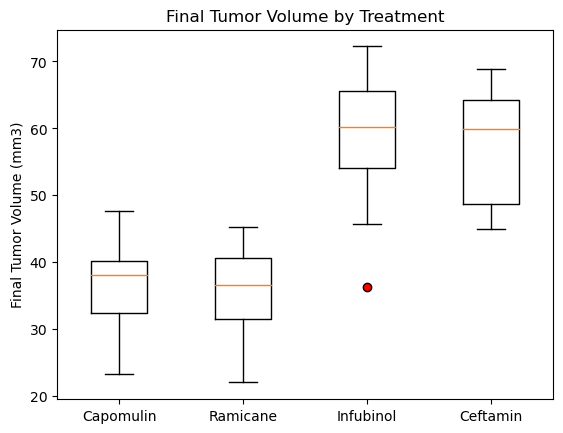

In [43]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
flierprops = dict(markerfacecolor='r')
ax1.boxplot(tumor_volume, labels=treatment_list, flierprops=flierprops)
plt.title("Final Tumor Volume by Treatment")
plt.show()

## Line and Scatter Plots

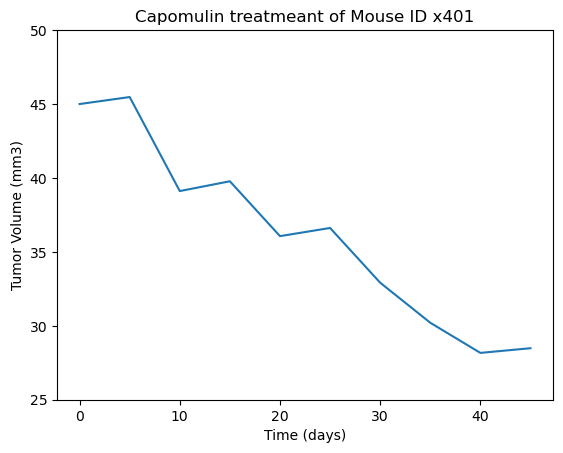

In [44]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin (x401)
x401_df = mouse_clean_df.loc[mouse_clean_df["Mouse ID"] == "x401"]
x_axis = x401_df["Timepoint"]
y_axis = x401_df["Tumor Volume (mm3)"]
plt.title("Capomulin treatmeant of Mouse ID x401")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(25,50)
plt.plot(x_axis, y_axis)
plt.show()

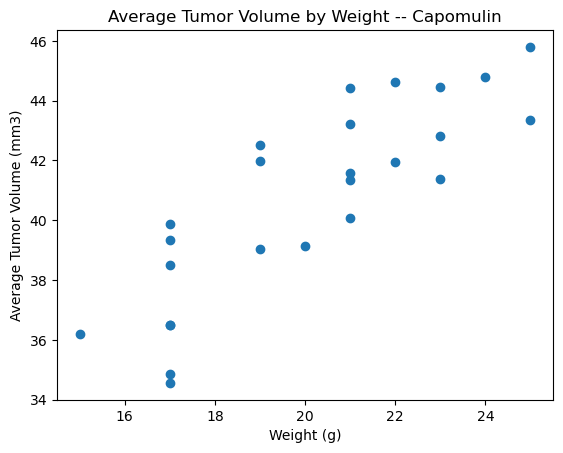

In [45]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Isolate Capomulin mice
capomulin_df = mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == "Capomulin"]

# Find the average weight for each mouse on Capomulin
avg_volume_capomulin_df = pd.DataFrame(capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()).rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})

# Clean the dataframe of duplicates
avg_volume_capomulin_merge_df = pd.merge(capomulin_df, avg_volume_capomulin_df, how="outer", on="Mouse ID").drop_duplicates("Mouse ID")

# Plot the data
weight = avg_volume_capomulin_merge_df["Weight (g)"]
volume = avg_volume_capomulin_merge_df["Average Tumor Volume (mm3)"]
plt.scatter(weight,volume)
plt.title("Average Tumor Volume by Weight -- Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume is 0.84


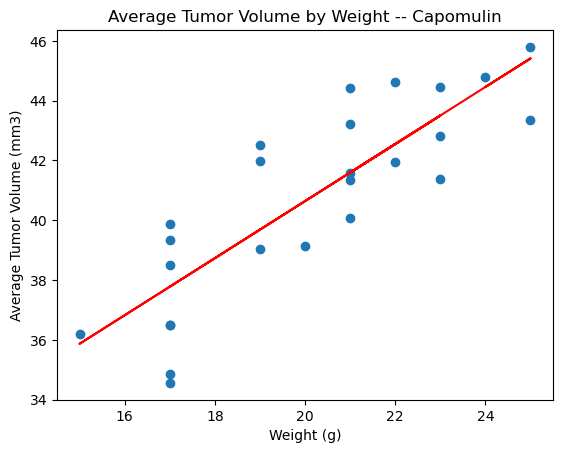

In [46]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(st.pearsonr(weight, volume)[0],2)}")

# Perform a linear regression on mouse weight and average tumor volume for the Capomulin regimen
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(weight, volume)
pe_fit = pe_slope * weight + pe_int

# Plot the linear model on top of scatter plot 
weight = avg_volume_capomulin_merge_df["Weight (g)"]
volume = avg_volume_capomulin_merge_df["Average Tumor Volume (mm3)"]
plt.scatter(weight,volume)
plt.plot(weight,pe_fit,"r-")
plt.title("Average Tumor Volume by Weight -- Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()